# Medidas de Bondad Ajuste.

(medidasBondadAjuste)=

## Introducción.

```{index} medidas bondad ajuste
```
En el tema [sobre la validación de modelos](validacionModelos) hemos visto diferentes métodos para comprobar si el ajuste hecho con un modelo es correcto o no. Para conseguir eso, necesitábamos una serie de métricas que son las que vamos a desarrollar en este apartado. 

La evaluación de modelos es un proceso fundamental en machine learning. Se usa para comprobar en qué medida el modelo que hemos creado es capaz de resolver el problema planteado. Si no es el caso, deberemos tomar decisiones
con el fin de obtener un nuevo modelo capaz de resolver de la mejor forma el problema en cuestión. 

Este apartado se ha divido en dos partes, correspondientes a dos tipos principales de problemas de machine learning: problemas supervisados de clasificación y problemas supervisados de regresión .


## Medidas para modelos supervisados de clasificación. 

Imaginemos que nos han contratado para diseñar un algoritmo capaz de predecir si un cliente comprará o no un determinado producto. Para ello, necesitamos un conjunto amplio de muestras con los datos de los clientes y, además, para cada una de ellas, es necesario que un experto las etiquete con una de las dos posibilidades: comprará o no comprará el producto. 

En este caso, el experto etiqueta con +1 las muestras de los clientes que finalmente compraron el producto, y con –1 las muestras de los que no. Usando este conjunto de datos etiquetados, se creará un *modelo de clasificación supervisada*. 

Una vez que tengamos el modelo, y dados los datos de un nuevo cliente, podremos usar el modelo para predecir la etiqueta para ese cliente. Es decir, podremos predecir si el cliente comprará o no el producto.

Para saber si el modelo que hemos creado funcionará bien o no, únicamente podemos usar los datos que tenemos etiquetados, ya que, de esta forma, podemos comparar las etiquetas predichas con las reales.


### Evaluación de problemas binarios.

Un problema binario es aquel que tiene únicamente dos clases, como por ejemplo el problema planteado anteriormente, en el cual quiere predecirse si un cliente comprará o no un producto. 

Para comprobar la calidad del modelo desarrollado, debemos dividir el conjunto original de muestras (las muestras que tenemos etiquetadas) en dos conjuntos:entrenamiento y test. 

El conjunto de entrenamiento nos servirá para obtener un modelo preliminar que tendrá un comportamiento similar al que
podríamos obtener usando todo el conjunto de datos original, pero no igual, puesto que tiene menos muestras. El conjunto de test se usará para validar el modelo preliminar entrenado. El valor que obtengamos será una estimación
optimista del resultado que se obtendrá cuando se predigan las futuras muestras reales.

Siguiendo con el ejemplo anterior, supongamos que tenemos una base de datos de 1,000 clientes, de los cuales 500 compraron el producto y 500 no lo compraron. Dividimos el conjunto en 800 muestras de entrenamiento y 200 de test. Es muy importante que el número de elementos de cada clase esté equilibrado en ambos conjuntos. Por ejemplo, un error importante sería que el conjunto de entrenamiento fuera de 500 clientes que compraron el producto y 300 clientes que no lo compraron; por lo tanto, el conjunto de test tendría únicamente muestras de clientes que no compraron el producto y ninguna de clientes que sí lo compraron. Lo correcto sería, en este caso, que el conjunto de entrenamiento tuviera 400 de cada tipo y, por lo tanto, el de test 100 de cada tipo.

La medida más usada para evaluar la calidad de un modelo es la *exactitud o acuracidad*, que se define como el número de muestras para las que el modelo ha predicho bien su clase frente al número total de muestras. Además de esta medida de evaluación de los modelos existen otras que veremos posteriormente.

### Evaluación de problemas binarios no equilibrados.

Un problema binario no equilibrado es aquel en el que el número de muestras de una clase es muy superior al número de muestras de la otra. Supongamos, por ejemplo, que existe un sistema de aprendizaje automático capaz de detectar de forma temprana una enfermedad mortal. El sistema toma como entrada un conjunto de datos del paciente y devuelve 1 si el paciente tiene la enfermedad, y –1 en el caso contrario. En el caso de detectar la enfermedad, podrán tomarse las medidas oportunas para aumentar las probabilidades de superarla. Sin embargo, **la medicación tiene unos efectos secundarios muy
desagradables**, por lo que no se recomienda que un paciente sano la tome.

En este ejemplo, la clase objetivo es la clase positiva, es decir, detectar que el paciente tiene la enfermedad. La otra clase es la clase negativa.

Con el fin de comprobar si el sistema desarrollado funciona correctamente, se han realizado 10,000 predicciones, de las cuales 9,500 eran de pacientes sanos y 500 de pacientes con la enfermedad. El sistema ha predicho como sanos a 9,450 de los pacientes sanos, y como enfermos a 300 pacientes con la enfermedad. Por lo tanto, el sistema ha acertado en 9,450 + 300 = 9,750 casos de los 10,000. Una posible medida de la calidad del proceso es, tal como se ha explicado en el apartado anterior, calcular la exactitud o acuracidad del sistema. En este caso es 9,750/10,000 = 0.975. Es decir, el sistema acierta en un 97.5 % de los casos.

El valor obtenido para la exactitud podría llevarnos a confusión: aunque ciertamente es un valor muy alto, en la clase objetivo únicamente ha acertado el 60 % de los casos (300 de 500). En realidad, el resultado es muy malo, pues
hay 200 pacientes (el 40 %) que tienen la enfermedad y el sistema no lo ha detectado. En este tipo de problemas, es crucial acertar la gran mayoría de los casos de la clase objetivo, aunque ello implique aumentar ligeramente los
fallos en la clase negativa. En esta situación, resulta desagradable medicar a un paciente sano (errar en la clase negativa), pero puede resultar mortal no medicar a uno enfermo (errar en la clase positiva). En nuestro ejemplo, hay
50 personas que sufrirían los efectos secundarios por error, pero 200 personas que podrían fallecer por no medicarse.

En este apartado, se presentará una medida para evaluar este tipo de problemas llamada *F-measure, F-score o F1-score*, que tiene en cuenta lo bueno o malo que es el modelo a la hora de predecir correctamente la clase objetivo, pero previamente vamos a definir otra serie de conceptos.

### Medidas de evaluación en modelos de clasificación.

Para entender mejor las diversas medidas que se utilizan en los modelos supervisados de clasificación, es conveniente en primer lugar introducir el concepto de matriz de confusión, que no es más que una tabla de doble entrada, en la que en filas se colocan las clasificaciones correctas, y en columnas las clasificaciones previstas por el modelo. En este apartado nos vamos a centrar en las clasificaciones binarias. En estos casos una matriz de confusión tendría el siguiente formato (se ha mantenido el formato de salida de scikit learn).

![matriz Confusión](figuras/MatrizConfusion.svg)

En este gráfico vamos a denotar por 0 no tener la característica estudiada y por 1 tenerla. De acuerdo con esto es la casilla superior izquierdo anotamos los casos en los que realmente no se tienen la carcaterística y el algoritmo predice lo mismo, es decir los verdaderos negativos(TN o true negativos). En la casilla superior derecha estarán los casos en los que no se tiene realmente la característica, pero el algoritmo predice que sí, serían los falsos positivos (FP). En la parte inferior izquierda estarían los falsos negativos (FN), es decir serían positivos realmente pero el algoritmo los clasifica como negativos, y por último en la zona inferior derecha están los verdaderos positivos (TP) que son los individuos que realmente son positivos y el algoritmo los clasifica como tal. 

```{index} acuracidad
```
De la clasificación anterior, se pueden obtener una serie de indicadores muy utilizados en métodos de clasificación. A continuación  se exponen estos indicadores.

* **La acuracidad**. Mide el nivel de aciertos (tanto positivos como negativos) del algoritmo, y por lo tanto la expresión matemática que lo define es la suma de aciertos dividido por el total de observaciones, es decir:

$$Acuracidad = \frac{TP+TN}{TP+TN+FP+FN}$$

* **Precisión**. Es la probabilidad de verdadero positivo condicionado a que el algoritmo prediga resultado positivo. La expresión matemática es la siguiente:

$$Precisión = \frac{TP}{TP+FP}$$

* **Recall o sensibilidad**. Es la probabilidad de verdadero positivo condicionado a que realmente sea positivo. La expresión matemática es la siguiente.

$$ Recall \,o\, sensibilidad = \frac{TP}{TP+FN}$$

En la siguiente figura se pueden ver representados estos conceptos

![Precisión Recall](figuras/PrecisionRecall.svg)


Otros indicadores, que son ampliamente utilizados en el mundo de la medicina son:


```{index} sensibilidad
```

* **Sensibilidad**. Es la probabilidad condicionada de ser positivo en el test, sabiendo que es positivo. La expresión matemática utilizada es la siguiente.

$$ Sensibilidad = \frac{TP}{TP+FN}$$



```{index} especifidad
```

* **Especifidad**. Es la probabilidad de ser negativo en el test, sabiendo que realmente es positivo. La expresión matemática es la siguiente:

$$Especifidad = \frac{TN}{TN+FP} $$

Por último los otros dos conceptos también bastante utilizados son los siguientes:

* **True positive rate (TPR)**. Que es el porcentaje de aciertos positivos del test y por lo tanto la expresión matemática es la siguiente.

$$ TPR=\frac{TP}{TP+FN}$$

* **False positivo rate (FPR)**. Que es el porcentaje de aciertos negativos del test y por lo tanto la expresión matemática es la siguiente (observar que este valor es igual a 1-especifidad).

$$ FPR=\frac{FP}{TN+FP}=1\,-\,especifidad$$


```{index} F-score
```

Una medidad muy utilizada en el caso de que se tengan datos de clasificación desequilibrados es la F-score, que no es más que la media harmónica entre la sensibilidad y la especifidad, la expresión matemática es la siguiente:

$$F-score=2\frac{Precision \cdot Recall}{Precision+Recall}$$

Aunque una medida aún más general que la anterior es el indicador $F_{\beta}$ que tiene la siguiente expresión matemática.

$$F_{\beta}=(1+\beta^{2})\cdot\frac{precisi\acute{o}n\cdot recall}{precision+recall}$$

En scikip learn, se pueden encontrar estas medidas <a href="https://scikit-learn.org/stable/modules/model_evaluation.html#the-scoring-parameter-defining-model-evaluation-rules" target="_blank">en el siguiente enlace</a>.

```{index} curva de ROC
```

### Medidas de evaluación modelos multiclase.

En la sección anterior hemos visto diversas medidas de evaluación de los modelos de clasificación binaria. Estas medidas se extienden sin ninguna dificultad a los modelos multiclase en la forma que se explica en este apartado. 

En lo que respecta a la acuracidad del modelo no hay ningún problema pues se trata del cociente entre los casos bien clasificados (zona de la diagonal de la matriz de confusión), dividido entre el número total de casos.

Por lo que respecta a la **precisión**, nos vamos a apoyar en la siguiente matriz de confusión para calcularla.

![Matriz Confusión 1](figuras/Mconfusion1.PNG)

Recordemos la fórmula de cálculo de la Precisión:

$$Precisión = \frac{TP}{TP+FP}$$

Como vemos la matriz de confusión en este caso tiene un tamaño de 10x10, en esta situación cual sería los TP (true positives) pues serían los que se clasifican en la misma clases de donde realmente son. Así por ejemplo para la clase 9, en total TP serían 947 casos. Los falsos positivos en este caso serían el resto de valores que el algoritmo ha clasificado como 9 pero no son de la clase 9. Por lo tanto la precisión para la clase 9 sería la siguiente:

$$ 947/(947+1+38+40+2)=0.92$$

Para el caso de la clase 2 ( marcado también con un rectángulo rojo en la figura anterior) sería:

$$ 762/(762+18+4+16+72+105+9)=0.77 $$

En relación al indicador **Recall** recordemos antes su fórmula:

$$ Recall \,o\, sensibilidad = \frac{TP}{TP+FN}$$

En este los FN serán los que son realmente positivos, pero el algoritmo los clasifica en otra categoría. Por ejemplo para la categoría 9 de la matriz de confusión anterior, los FN serán todos los casos que se encuentran en la fila 9 salvo los que están en la columna 9. En el siguiente gráfico, se destacan con un rectángulo rojo.

![Matriz Confusión 2](figuras/Mconfusion2.PNG)

En consecuencia el valor de Recall para la etiqueta 9 valdrá:

$$ 947/(947+14+36+3) = 0.947 $$

Para la etiqueta 2 este valor se obtiene de la siguiente manera:

$$ 762/ (762+14+2+13+122+75+12)=0.762$$

El valor de *F1 Score* se obtiene con la siguiente fórmula:

$$F1-score=2\frac{Precision \cdot Recall}{Precision+Recall}$$

En consecuencia el F1 score para 9 será: $2*0.92*0.947/(0.92+0.947)=0.933$

Y el valor de F1 Score para 2: $2*0.77*0.762/(0.77+0.762)=0.766$

Otros valores que obtenemos con scikit learn al utilizar el método *classification_report* (ver ejemplo más adelante) es *Macro average precision* y *weighted average precision* veamos lo que significan. Pero en primer lugar veamos los valores que se obtienen en cuanto a precision, recall y f1-score con los datos de la matriz de confusión mostrada anteriormente.


![Matriz Confusión 3](figuras/Mconfusion3.PNG)

Entonces por *Macro average precision*, que es la media aritmética simple de todos los valores de presuocisión obtenidos, es decir en este caso:

$$ (0.80+0.95+0.77+0.88+0.75+0.95+0.68+0.90+0.93+0.92)/10=0.853 $$

Para calcular *weighted average precision* es la misma media que la anterior pero ponderando por el número de elementos que hay en cada clase. En el ejemplo que seguimos, hay 760 casos de la clase 0, 900 de la clase 1, 535 de la clase 2, 843 de la clase 3, 801 de la clase 4, 779 de la clase 5, 640 de la clase 6, 791 de la clase 7, 921 de la clase 8 y 576 de la clase 9. en total por lo tanto hay 7546 observaciones y en consecuencia la media ponderada por las observaciones que hay en cada clase será el *weighted average precision*, que valdrá:

$$(760*0.80+900*0.95+535*0.77+843*0.88+...+921*0.93+576*0.92)/7546 = 0.86 $$

### La curva de ROC

Las curvas ROC (receiver operating characteristic) son un método muy efectivo para validar el funcionamiento de un modelo de clasificación supervisada *en problemas binarios*. Imaginemos que estamos usando un clasificador supervisado
que, en vez de obtener un +1 cuando predice que la muestra es positiva y –1 cuando es negativa, nos proporciona un número entre 0.0 y 1.0 que indica la probabilidad de que la muestra pertenezca a la clase positiva. Por ejemplo, si el resultado es 0.2, significará que hay una probabilidad pequeña de que la muestra sea positiva. Sin embargo, si el resultado es 0.8, significará que hay una probabilidad alta de que la muestra sea positiva. En realidad, la gran mayoría de algoritmos de clasificación supervisada funcionan de esta forma.

Supongamos que, para un problema de clasificación supervisada binario, hemos entrenado tres algoritmos diferentes, y que para un conjunto de 20 muestras de test (10 de cada clase), hemos obtenido la probabilidad de que la muestra sea de la clase positiva. La figura que sigue muestra el resultado obtenido para los tres modelos entrenados. Los puntos rojos son las muestras negativas y los puntos azules son las muestras positivas. La figura de la izquierda muestra un mal resultado,
puesto que resulta muy difícil encontrar una frontera entre las muestras de ambas clases. La figura del centro presenta un resultado intermedio y la figura de la derecha muestra el mejor resultado de los tres, ya que, en este caso, es más fácil establecer una frontera entre ambas clases.

![Curva ROC](figuras/ROC.PNG)

Las tablas que siguen muestran, respectivamente, los TP, TN, FP y FN para los tres modelos entrenados, para un conjunto de umbrales de 0.0 a 1.0. Estas tablas también muestran la sensibilidad y 1 menos la especificidad de cada modelo.

La siguiente tabla corresponde al gráfico de la izquierda anterior

![Tabla 1](figuras/Tabla1.PNG)

La siguiente tabla se corresponde con el gráfico del centro anterior

![Tabla 2](figuras/Tabla2.PNG)

La siguiente tabla se corresponde con el gráfico de la derecha anterior

![Tabla 3](figuras/Tabla3.PNG)


La figura que sigue muestra las curvas ROC de los tres modelos. La curva ROC representa
para cada umbral un punto donde la coordenada x es la sensibilidad (=TPR) y la coordenada y es 1 menos la especificidad (= FPR). Una medida de la calidad del modelo es el área que queda debajo de la curva. Como puede comprobarse, dicha área será mayor en el modelo representado por la curva verde (muestras de la figura de la derecha y tercera tabla) que en el modelo intermedio representado por la curva roja (muestras de la figura del centro y la tabla intermedia), y el peor modelo será el representado por la curva azul (muestras de la figura la izquierda y la tabla primera).

![Curvas de ROC](figuras/ROC2.PNG)



el área bajo la curva ROC (Receiver operating characteristic) representa la probabilidad de que un individuo enfermo elegido al azar tenga mayor probabilidad estimada de padecer la enfermedad que un individuo no enfermo elegido también al azar. En la práctica este área es el porcentaje de pares de individuos enfermos y no enfermos en los que el enfermo tiene mayor probabilidad estimada de padecer la enfermedad que el no enfermo.

A continuación vemos un ejemplo de cómo poder obtener la curva de ROC con scikit learn

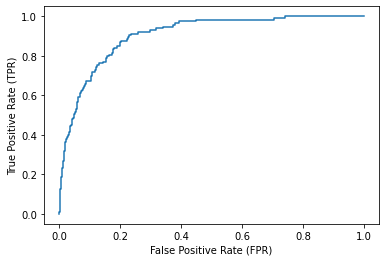

In [51]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import matplotlib.pyplot as plt

#importamos el fichero de datos
url = "https://raw.githubusercontent.com/Statology/Python-Guides/main/default.csv"
data = pd.read_csv(url)

#seleccionamos los campos que nos innteresan 
X = data[['student', 'balance', 'income']]
y = data['default']

# dividimos en train y test
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0) 

# definimos el modelo
log_regression = LogisticRegression()

#ajustamos el modelo
log_regression.fit(X_train,y_train)

#sacamos los posibles puntos de corte
y_pred_proba = log_regression.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)

#generamos la curva de ROC
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate (TPR)')
plt.xlabel('False Positive Rate (FPR)')
plt.show()

Un resumen de las métricas más importantes lo podemos sacar de la siguiente manera: 

In [54]:
from sklearn.metrics import classification_report, confusion_matrix

# Obtenemos los valores predichos
y_pred = log_regression.predict(X_test)
y_pred

print("Sacamos la matriz de confusión")

print(confusion_matrix(y_test, y_pred))

print("Obtenemos una serie de indicadores")


print(classification_report(y_test, y_pred))

Sacamos la matriz de confusión
[[2870   17]
 [  93   20]]
Obtenemos una serie de indicadores
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      2887
           1       0.54      0.18      0.27       113

    accuracy                           0.96      3000
   macro avg       0.75      0.59      0.62      3000
weighted avg       0.95      0.96      0.95      3000



## Medidas para modelos supervisados de regresión. 

```{index} error cuadrático medio, raíz del error cuadrático medio
```

Un problema supervisado de regresión se diferencia de un problema supervisado de clasificación en que lo que se predice es un valor continuo, y no una etiqueta entre un conjunto finito. Por ejemplo, un problema de regresión es predecir el valor de venta de una casa. El valor de la casa es un número  real positivo que es una cantidad continua. Si se discretiza este valor en varios segmentos, entonces transformaríamos el problema en uno de clasificación supervisada.

Un concepto importante, a la hora de validar la calidad de un modelo de regresión, es el residuo o error de una muestra, que se define como la diferencia entre el valor real de la muestra $y_i$ y el valor predicho por el modelo $\hat{y}_{i}$. A partir del residuo, pueden definirse las dos medidas más comunes que suelen usarse: *el error cuadrático medio* (ECM o RMS, eninglés) y la *raíz del error cuadrático medio* (RECM o RMSE, en inglés);se definen como se muestra a continuación:

$$ ECM=\frac{1}{N}\sum_{i=1}^{N}(y_{i}-\hat{y}_{i})^{2}$$

$$RECM=\sqrt{ECM} $$

```{index} mean absolute error (MAE)
```

Otro indicador muy utiliza es el denominado mean absolute error (MAE)

$MAE=\frac{1}{N}\sum_{i=1}^{N}\left|y_{i}-\hat{y}_{i}\right|$

Para realizar correctamente la validación del modelo de regresión, puede usarse la validación cruzada. En este caso, también es muy importante distribuir correctamente las muestras entre las diferentes carpetas. Supongamos que nuestra base de datos tiene 800 muestras de casas con precios entre 100,000 y 500,000 euros.

Para distribuir correctamente las muestras, podemos crear arbitrariamente tres grupos diferentes según el precio de las casas. Por ejemplo, el primer grupo estaría compuesto por las casas entre 100,000 y 200,000 euros; el segundo grupo, entre 200,000 y 300,000 euros, y el último grupo, con las de más de 300,000. El siguiente paso sería contar el número de muestras de cada grupo. Por ejemplo, supongamos que tenemos 400, 300 y 100 muestras en cada grupo. El siguiente paso es distribuir las muestras de cada grupo en las diferentes carpetas intentando que el número de muestras de cada grupo en cada carpeta sea similar. Siguiendo con el ejemplo y asumiendo que usamos 10 carpetas, pondríamos 40, 30 y 10 muestras de cada grupo en cada carpeta.

La métricas de regresión que se pueden encontrar en scikit learn, se pueden ver <a href="https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics" target="_blank">en este enlace</a>.

## Bibliografía.

* https://interactivechaos.com/es/manual/tutorial-de-machine-learning/la-curva-roc

* https://aprendeia.com/curvas-roc-y-area-bajo-la-curva-auc-machine-learning/

* https://scikit-learn.org/stable/auto_examples/model_selection/plot_precision_recall.html